# Descriptive analysis on global Super Store Data

Shopping online is currently the need of the hour. Because of this COVID, it's not easy to walk in a store randomly and buy anything you want. I this I am trying to understand a few things like

**Customers Analysis**

* Profile the customers based on their frequency of purchase - calculate frequency of purchase for each customer
* Do the high frequent customers are contributing more revenue
* Are they also profitable - what is the profit margin across the buckets
* Which customer segment is most profitable in each year.
* How the customers are distributed across the countries- -

**Product Analysis**

* Which country has top sales?
* Which are the top 5 profit-making product types on a yearly basis
* How is the product price varying with sales - Is there any increase in sales with the decrease in price at a day level
* What is the average delivery time across the counties - bar plot

I will keep updating the analysis.

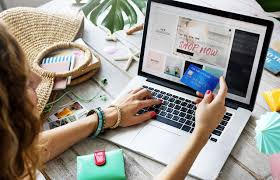

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/global-super-store-dataset/Global_Superstore2.csv
/kaggle/input/global-super-store-dataset/Global_Superstore2.xlsx


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel('/kaggle/input/global-super-store-dataset/Global_Superstore2.xlsx')

In [4]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


Customers Analysis:

1. Profile the customers based on their frequency of purchase - calculate frequency of purchase for each customer and plot a histogram to get the threshold for Low/Mid/High frequency customers

2. Does the high frequent customers are contributing more revenue

3. Are they also profitable - what is the profit margin across the buckets

4. Which customer segment is most profitable in each year ( there is a column called customer segment)

5. How the customers are distributed across the countries - pie chart 

6. Write a function to split the global store data into different unique data frames based on the unique values in country column [Means, we should have one data frame for one country as function output ]  

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [6]:
df.shape

(51290, 24)

We can see that the data has 51290 data entries with 24 features.

In [7]:
df.describe()
# can see that there is negetive trend in profit
# in sales  data is either right skewed or there are too many outliers
# the discount falls in the range of 75% - 100%

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375915
std,14806.29199,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296804
min,1.00000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,12823.25000,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000


In [8]:
df.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [9]:
# We can see that only the postal code attribute has 41,296 null vlues. Thats almost 80 % of the values in the column are null

In [10]:
df.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

EDA (To get a better understanding of thr data)

lets understand how many of them are categorical and how many unique values each categorical columns have,

In [11]:
cat_cols = df.select_dtypes(exclude=['int64','float64']).columns
cat_cols

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'City', 'State', 'Country', 'Market',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Order Priority'],
      dtype='object')

In [12]:
# num_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_colms = df._get_numeric_data()
num_colms.head()
# df['Ship Mode'].unique()
# df['Ship Mode'].value_counts()
# df['Segment'].value_counts()
# df['Market'].value_counts()
# df['Region'].value_counts()
# df['Category'].value_counts()
# df['Sub-Category'].value_counts()
# df['Product Name'].value_counts()
# df['Order Priority'].value_counts()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
0,32298,10024.0,2309.650,7,0.0,762.1845,933.57
1,26341,NaN,3709.395,9,0.1,-288.7650,923.63
2,25330,NaN,5175.171,9,0.1,919.9710,915.49
3,13524,NaN,2892.510,5,0.1,-96.5400,910.16
4,47221,NaN,2832.960,8,0.0,311.5200,903.04


### Customer Analysis

#1. Profile the customers based on their frequency of purchase - calculate frequency of purchase for each customer and 
#plot a histogram to get the threshold 
#for Low/Mid/High frequency customers

In [13]:
# purchase frequency = no of orders / no of unique customers (365 days)
# df['Order ID'].groupby('Customer ID').count()

In [14]:
df.nunique()

Row ID            51290
Order ID          25035
Order Date         1430
Ship Date          1464
Ship Mode             4
Customer ID        1590
Customer Name       795
Segment               3
City               3636
State              1094
Country             147
Postal Code         631
Market                7
Region               13
Product ID        10292
Category              3
Sub-Category         17
Product Name       3788
Sales             22995
Quantity             14
Discount             27
Profit            24575
Shipping Cost     10037
Order Priority        4
dtype: int64

In [15]:
df_customer = df[['Customer ID','Order ID','Order Date', 'Ship Date', 'Ship Mode','Country']]
# .drop_duplicates()
df_customer.count()

Customer ID    51290
Order ID       51290
Order Date     51290
Ship Date      51290
Ship Mode      51290
Country        51290
dtype: int64

In [16]:
df_customer1 = df[['Customer ID','Order ID','Order Date', 'Ship Date', 'Ship Mode','Country']].drop_duplicates()
df_customer1.count()

Customer ID    25754
Order ID       25754
Order Date     25754
Ship Date      25754
Ship Mode      25754
Country        25754
dtype: int64

In [17]:
# df2 = df.drop_duplicates()
# df2.shape
# df_customer[[df_customer['Customer ID','Order ID','Order Date']].duplicated() == True]
# df_customer['Customer ID'].nunique()
df_customer1.head()

,Customer ID,Order ID,Order Date,Ship Date,Ship Mode,Country
0,RH-19495,CA-2012-124891,31-07-2012,31-07-2012,Same Day,United States
1,JR-16210,IN-2013-77878,05-02-2013,07-02-2013,Second Class,Australia
2,CR-12730,IN-2013-71249,17-10-2013,18-10-2013,First Class,Australia
3,KM-16375,ES-2013-1579342,28-01-2013,30-01-2013,First Class,Germany
4,RH-9495,SG-2013-4320,05-11-2013,06-11-2013,Same Day,Senegal


In [18]:
df_customer1['Customer ID'].nunique()
# there are only 1590 unique customer ids out of 25754 rows in the customer data

1590

In [19]:
# First_Purchase_Date = pd.to_datetime(df['Order Date']).min()
# latest_purchase_date = pd.to_datetime(df['Order Date']).max()
# Total_shipping_cost = df['Shipping Cost'].sum()
# total_sales = df['Sales'].sum()
# unique_order_id = df['Order_id'].nunique()


def new_features(x):
    d = []
    d.append(x['Order ID'].nunique())
    d.append(x['Sales'].sum())
    d.append(x['Shipping Cost'].sum())
    d.append(pd.to_datetime(x['Order Date']).min())
    d.append(pd.to_datetime(x['Order Date']).max())
    d.append(x['City'].nunique())
    return pd.Series(d, index=['Purchases','Total_Sales','Total_Cost','First_Purchase_Date','Latest_Purchase_Date','Location_Count'])

df_customer_new = df.groupby('Customer ID').apply(new_features)

In [20]:
df_customer_new.columns

Index(['Purchases', 'Total_Sales', 'Total_Cost', 'First_Purchase_Date',
       'Latest_Purchase_Date', 'Location_Count'],
      dtype='object')

In [21]:
from datetime import datetime
df_customer_new['Duration'] = (df_customer_new['Latest_Purchase_Date'] - df_customer_new['First_Purchase_Date']).dt.days

In [22]:
df_customer_new['Frequency'] = df_customer_new['Duration']/df_customer_new['Purchases']
df_customer_new['Frequency'].head()

Customer ID
AA-10315     71.736842
AA-10375     58.434783
AA-10480     66.650000
AA-10645     39.527778
AA-315      177.285714
Name: Frequency, dtype: float64

In [23]:
df_customer_new.head()

,Purchases,Total_Sales,Total_Cost,First_Purchase_Date,Latest_Purchase_Date,Location_Count,Duration,Frequency
Customer ID,,,,,,,,
AA-10315,19,13747.41300,1236.15,2011-03-31,2014-12-23,18,1363,71.736842
AA-10375,23,5884.19500,903.92,2011-04-21,2014-12-25,23,1344,58.434783
AA-10480,20,17695.58978,1633.67,2011-01-11,2014-09-05,20,1333,66.650000
AA-10645,36,15343.89070,1752.27,2011-01-12,2014-12-05,35,1423,39.527778
AA-315,7,2243.25600,215.80,2011-08-06,2014-12-29,7,1241,177.285714


In [24]:
df_customer_new['Frequency'].describe()

count    1590.000000
mean      111.303339
std        80.489358
min         0.000000
25%        50.669643
50%        73.055728
75%       155.083333
max       655.500000
Name: Frequency, dtype: float64

In [25]:
# df_customer_new['Duration'].describe()
# Total time duration = approx 3.7 years

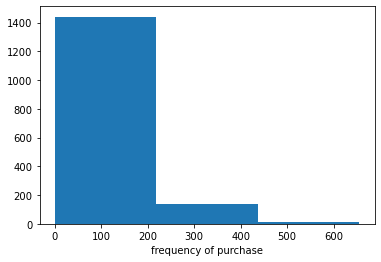

In [26]:
# 1. Profile the customers based on their frequency of purchase - calculate frequency of purchase for
# each customer and plot a histogram to get the threshold for Low/Mid/High frequency customers

plt.hist(df_customer_new['Frequency'], bins=3)
plt.xlabel('frequency of purchase')
plt.show()

In [27]:
# bucketing continuous data
def freq(x):
    if x < 219:
        return 'Low' 
    elif x < 436:
        return 'Mid' 
    else:
        return 'High'

df_customer_new['freq_range'] = df_customer_new.Frequency.apply(freq)

df_customer_new['freq_range'].value_counts()

Low     1442
Mid      138
High      10
Name: freq_range, dtype: int64

In [28]:
# profiling based on purchase frequency
df_customer_new.head()

,Purchases,Total_Sales,Total_Cost,First_Purchase_Date,Latest_Purchase_Date,Location_Count,Duration,Frequency,freq_range
Customer ID,,,,,,,,,
AA-10315,19,13747.41300,1236.15,2011-03-31,2014-12-23,18,1363,71.736842,Low
AA-10375,23,5884.19500,903.92,2011-04-21,2014-12-25,23,1344,58.434783,Low
AA-10480,20,17695.58978,1633.67,2011-01-11,2014-09-05,20,1333,66.650000,Low
AA-10645,36,15343.89070,1752.27,2011-01-12,2014-12-05,35,1423,39.527778,Low
AA-315,7,2243.25600,215.80,2011-08-06,2014-12-29,7,1241,177.285714,Low


2.Are the high frequent customers contributing more revenue

In [29]:
result = df.groupby(["Customer Name"])['Profit'].aggregate(np.sum).reset_index().sort_values('Profit',ascending = False).head(20)

In [30]:
# revenue = sales *  quantity 

In [31]:
df_customer_new['Revenue'] = df_customer_new['Purchases'] *  df_customer_new['Total_Sales']

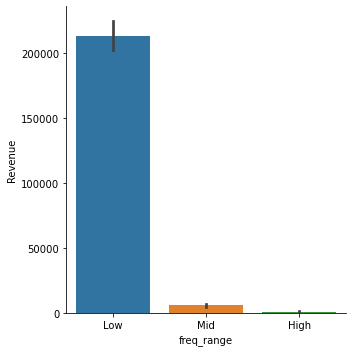

In [32]:
sns.catplot(x="freq_range", y="Revenue", kind="bar", data=df_customer_new);

From the graph we can see that the high frequent customers are contrinuting less

3. Are they also profitable - what is the profit margin across the buckets

In [33]:
profit_margin = df_customer_new.groupby('freq_range')

In [34]:
profit_margin

In [35]:
# 4. Which customer segment is most profitable in each year ( there is a column called customer segment

In [36]:
df.Segment.value_counts()

Consumer       26518
Corporate      15429
Home Office     9343
Name: Segment, dtype: int64

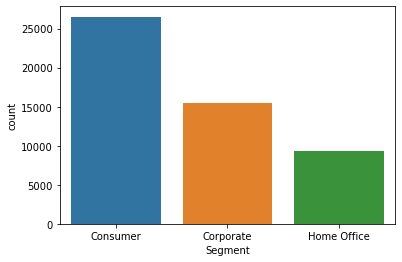

In [37]:
sns.countplot(x="Segment",data = df)

In [38]:
df_x = df
df_x['year'] = pd.DatetimeIndex(df['Order Date']).year
df_x.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,year
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical,2012
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical,2013
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium,2013
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium,2013
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical,2013


<Figure size 1728x1080 with 0 Axes>

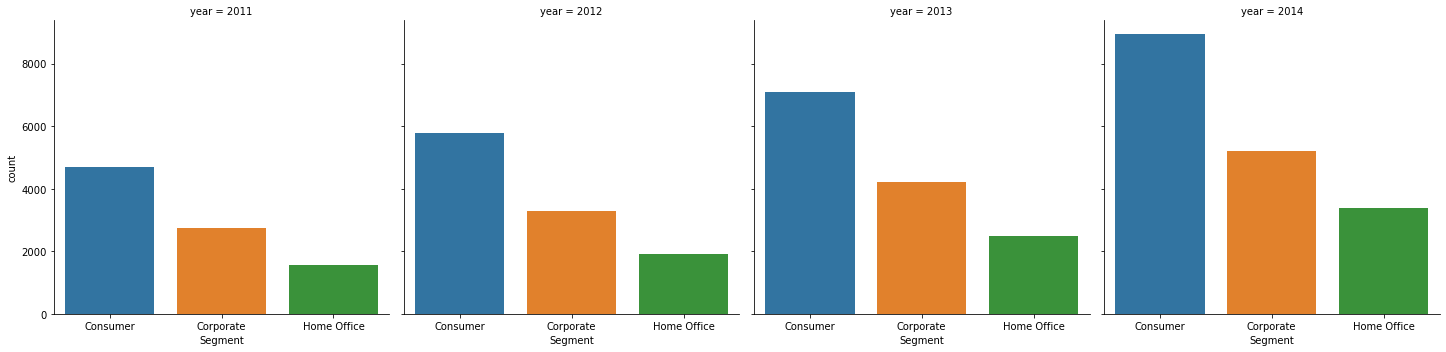

In [39]:
plt.figure(figsize=(24,15))
sns.catplot(x="Segment", col="year", data=df_x, kind="count")
plt.show()

In [40]:
# 5. How the customers are distributed across the countries - pie chart 

In [41]:
customer_country = pd.DataFrame({'Count' : df.groupby(["Country"]).size()}).reset_index().sort_values('Count',ascending = False).head(10)

In [42]:
customer_country

,Country,Count
139,United States,9994
6,Australia,2837
44,France,2827
81,Mexico,2644
47,Germany,2065
26,China,1880
138,United Kingdom,1633
17,Brazil,1599
57,India,1555
58,Indonesia,1390


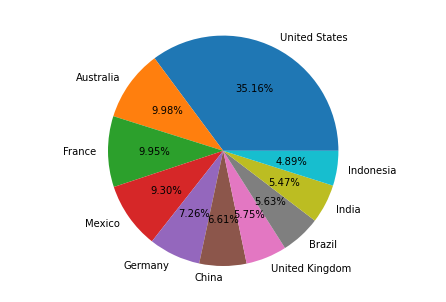

In [43]:
from matplotlib import pyplot as plt
import numpy as np
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
Countries = customer_country['Country']
cust_count = customer_country['Count']
ax.pie(cust_count, labels = Countries,autopct='%1.2f%%')
plt.show()

6. Write a function to split the global store data into different unique data 
frames based on the unique values in country column 
[Means, we should have one data frame for one country as function output ]  

In [44]:
# def new_dataframe(x):
#     d = []
#     return pd.Series(d, index= df.columns)


# df_new_dataframe = df.groupby('Country').apply(new_dataframe)

for i, g in df.groupby('Country'):
    globals()['df_' + str(i)] =  g
    
print (df_China)

       Row ID       Order ID  Order Date   Ship Date       Ship Mode  \
14      27704  IN-2013-73951  06-06-2013  08-06-2013    Second Class   
22      21586  IN-2011-44803  02-05-2011  03-05-2011     First Class   
47      24341  IN-2014-50473  28-08-2014  29-08-2014     First Class   
64      25314  IN-2014-66615  18-01-2014  23-01-2014  Standard Class   
70      21191  IN-2013-40050  07-06-2013  09-06-2013     First Class   
...       ...            ...         ...         ...             ...   
50478   23920  IN-2014-14402  26-06-2014  28-06-2014    Second Class   
50780   23091  IN-2012-75134  01-08-2012  01-08-2012        Same Day   
50991   20655  IN-2014-18252  09-01-2014  14-01-2014  Standard Class   
51104   22233  IN-2012-64893  15-05-2012  15-05-2012        Same Day   
51216   30281  IN-2012-40813  07-12-2012  11-12-2012    Second Class   

      Customer ID      Customer Name      Segment          City         State  \
14       PF-19120       Peter Fuller     Consumer    M

In [45]:
grouped = df.groupby(df.Country)

China = grouped.get_group("China")

### Product Analysis

1. Plot the countries with their total sales  - bar plot

Text(0.5, 0, 'Countries')

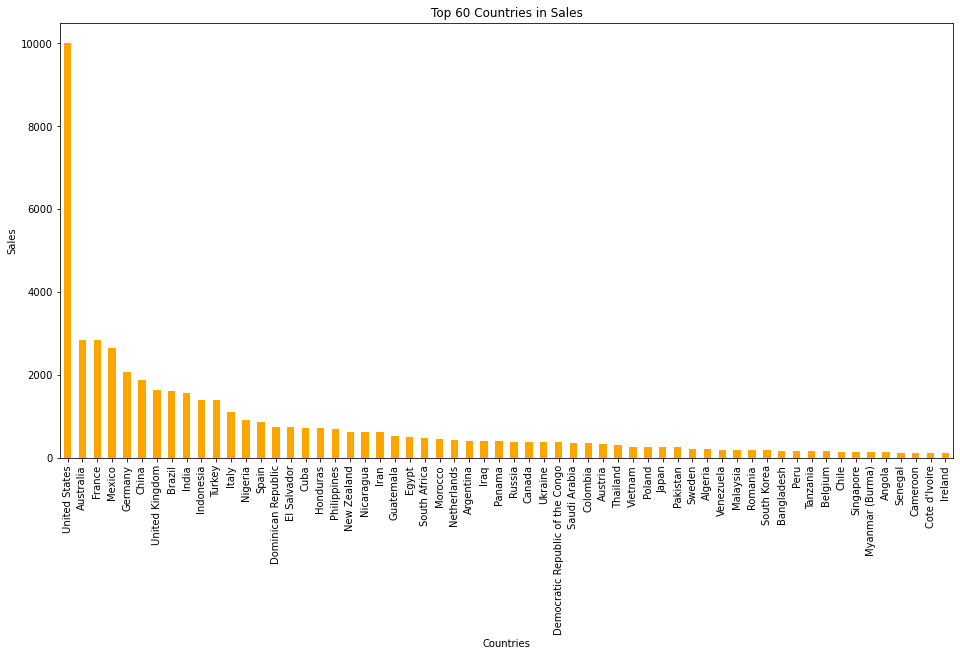

In [46]:
plt.figure(figsize=(16,8))
countries = df.groupby('Country')['Sales'].count().sort_values(ascending=False)
countries = countries [:60]
countries.plot(kind='bar', color='orange')
plt.title('Top 60 Countries in Sales')
plt.ylabel('Sales')
plt.xlabel('Countries')

1. What are top 5 profit making product types on a yearly basis

In [47]:
products = df.groupby('Product Name')['Profit'].count().sort_values(ascending=False)
# top_5_products = products[:5]
# top_5_products
products.head()

Product Name
Staples                           227
Cardinal Index Tab, Clear          92
Eldon File Cart, Single Width      90
Rogers File Cart, Single Width     84
Ibico Index Tab, Clear             83
Name: Profit, dtype: int64

<!-- 2. How the product price is varying with sales - Is there any increase in sales with 
decrease in price at a day level (Plot a chart with maximum & minimum price increase 
at any day and also that day sales). Price change is calculated from previous day. -->

3. What is the average delivery date across the countries - bar plot


In [48]:
df_x = df.drop_duplicates()

df_x['Order_to_Ship_Days'] = (pd.to_datetime(df_x['Ship Date']) 
                                           - pd.to_datetime(df_x['Order Date'])).dt.days

# # df_customer1.head()
#days_taken = df_x.groupby('Order ID')['Order_to_Ship_Days'].mean()
# total_days = days_taken.to_frame()
# total_days.head()

In [49]:
df_x.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,year,Order_to_Ship_Days
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical,2012,0
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical,2013,61
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium,2013,1
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium,2013,2
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical,2013,31


Text(0.5, 0, 'Countries')

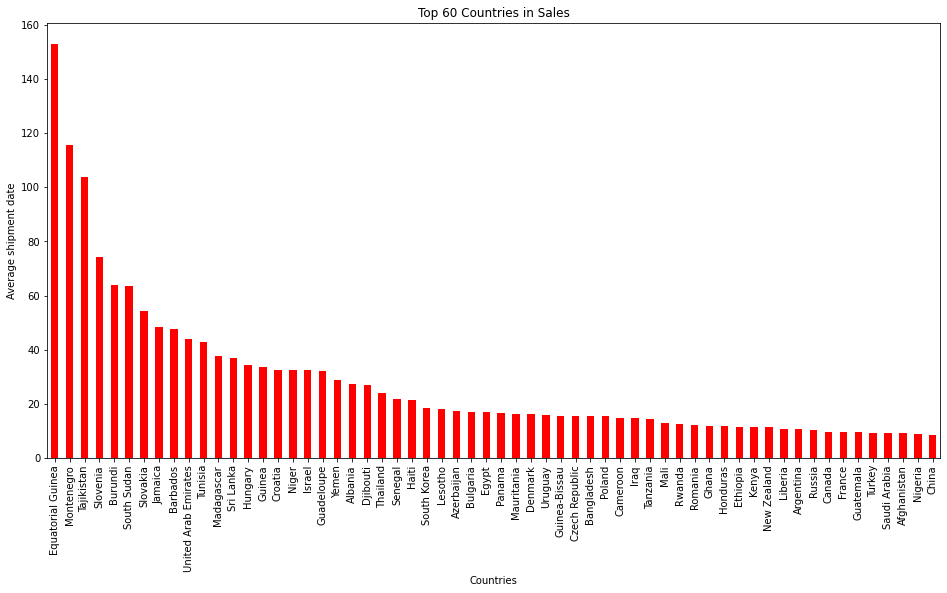

In [50]:
plt.figure(figsize=(16,8))
countries = df_x.groupby('Country')['Order_to_Ship_Days'].mean().sort_values(ascending=False)
countries = countries [:60]
countries.plot(kind='bar', color='red')
plt.title('Top 60 Countries in Sales')
plt.ylabel('Average shipment date')
plt.xlabel('Countries')

--- To Be continued ---